In [40]:
import os
import sys
import pandas as pd
import numpy as np
import nltk
from sklearn import tree
from IPython.display import display

In [41]:
data = pd.read_csv('dataset.csv')

### Analisis Dataset Keseluruhan

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lokasi              2644 non-null   int64  
 1   status              2644 non-null   int64  
 2   tipe                2644 non-null   int64  
 3   id_daftar_sekolah   2644 non-null   int64  
 4   id_prodi_pilihan_1  2644 non-null   int64  
 5   id_prodi_pilihan_2  2644 non-null   int64  
 6   nilai_tpa_verbal    2644 non-null   int64  
 7   nilai_tpa_spasial   2644 non-null   int64  
 8   nilai_tpa_analogi   2644 non-null   int64  
 9   nilai_tpa_numerik   2644 non-null   int64  
 10  avg_nilai_uan       1904 non-null   float64
 11  avg_nilai_raport    573 non-null    float64
 12  is_diterima         2644 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 268.7 KB


In [70]:
col_names = data.columns.values.tolist()

In [71]:
for col in col_names:
    
    print(data[col].value_counts())  

0    1501
1    1143
Name: lokasi, dtype: int64
1    1347
0    1297
Name: status, dtype: int64
1    2333
0     311
Name: tipe, dtype: int64
7       101
26       42
8        40
35       37
16       35
       ... 
2399      1
2400      1
1217      1
1194      1
2176      1
Name: id_daftar_sekolah, Length: 1097, dtype: int64
9     1753
7      249
10     192
6      136
3      123
5       77
4       69
2       18
8       17
11      10
Name: id_prodi_pilihan_1, dtype: int64
9     892
10    732
1     578
3     167
4      99
7      95
8      35
5      28
11     13
6       5
Name: id_prodi_pilihan_2, dtype: int64
0      1624
10      268
20      118
100      88
30       84
60       83
40       70
80       67
130      63
150      48
170      28
90       26
180      22
120      17
70       14
160       8
50        7
190       4
140       3
110       2
Name: nilai_tpa_verbal, dtype: int64
0      1624
10      113
60      111
20       86
30       83
90       78
100      69
80       62
70       57
50  

In [72]:
data['is_diterima'].value_counts()

1    1675
0     969
Name: is_diterima, dtype: int64

In [73]:
data.isnull().sum()

lokasi                   0
status                   0
tipe                     0
id_daftar_sekolah        0
id_prodi_pilihan_1       0
id_prodi_pilihan_2       0
nilai_tpa_verbal         0
nilai_tpa_spasial        0
nilai_tpa_analogi        0
nilai_tpa_numerik        0
avg_nilai_uan          740
avg_nilai_raport      2071
is_diterima              0
dtype: int64

### Analisis Data Jalur Prestasi Mentah

In [74]:
jp = pd.read_csv('data_jp.csv')
jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lokasi              1624 non-null   int64  
 1   status              1624 non-null   int64  
 2   tipe                1624 non-null   int64  
 3   id_daftar_sekolah   1624 non-null   int64  
 4   id_prodi_pilihan_1  1624 non-null   int64  
 5   id_prodi_pilihan_2  1624 non-null   int64  
 6   avg_nilai_uan       1228 non-null   float64
 7   avg_nilai_raport    573 non-null    float64
 8   is_diterima         1624 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 114.3 KB


In [75]:
col_names = jp.columns.values.tolist()
for col in col_names:
    
    print(jp[col].value_counts()) 

0    817
1    807
Name: lokasi, dtype: int64
0    845
1    779
Name: status, dtype: int64
1    1452
0     172
Name: tipe, dtype: int64
7       81
26      37
8       33
35      32
20      28
        ..
1300     1
479      1
1247     1
673      1
2176     1
Name: id_daftar_sekolah, Length: 748, dtype: int64
9     1167
10     124
7      121
3       55
5       51
4       41
6       37
8       15
11       7
2        6
Name: id_prodi_pilihan_1, dtype: int64
9     458
1     446
10    438
3      94
4      63
7      59
8      27
5      22
11     12
6       5
Name: id_prodi_pilihan_2, dtype: int64
0.0      1028
81.0        9
63.0        7
68.0        6
83.0        6
         ... 
187.0       1
72.0        1
42.0        1
254.0       1
45.0        1
Name: avg_nilai_uan, Length: 83, dtype: int64
0.0     175
83.0     37
81.0     35
80.0     34
77.0     29
79.0     27
82.0     27
85.0     27
78.0     26
75.0     24
76.0     20
84.0     19
88.0     14
86.0     12
87.0     11
74.0     10
73.0      9
8

In [76]:
jp['is_diterima'].value_counts()

1    1122
0     502
Name: is_diterima, dtype: int64

In [77]:
jp.isnull().sum()

lokasi                   0
status                   0
tipe                     0
id_daftar_sekolah        0
id_prodi_pilihan_1       0
id_prodi_pilihan_2       0
avg_nilai_uan          396
avg_nilai_raport      1051
is_diterima              0
dtype: int64

### Analisis Data Jalur Prestasi Proses Lanjut

In [42]:
jp = pd.read_csv('data_jp_legit.csv')

In [43]:
jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lokasi              797 non-null    int64  
 1   status              797 non-null    int64  
 2   tipe                797 non-null    int64  
 3   id_daftar_sekolah   797 non-null    int64  
 4   id_prodi_pilihan_1  797 non-null    int64  
 5   id_prodi_pilihan_2  797 non-null    int64  
 6   avg_nilai_uan       797 non-null    float64
 7   avg_nilai_raport    797 non-null    int64  
 8   is_diterima         797 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 56.2 KB


In [44]:
col_names = jp.columns.values.tolist()
for col in col_names:
    
    print(jp[col].value_counts()) 

0    470
1    327
Name: lokasi, dtype: int64
1    418
0    379
Name: status, dtype: int64
1    724
0     73
Name: tipe, dtype: int64
7       29
343     15
16      15
8       14
26      13
        ..
1543     1
1541     1
276      1
1080     1
663      1
Name: id_daftar_sekolah, Length: 456, dtype: int64
9     427
7     113
3      54
10     52
5      50
4      40
6      34
8      15
11      7
2       5
Name: id_prodi_pilihan_1, dtype: int64
9     370
10    152
1     142
3      47
4      35
8      18
7      17
5       8
11      7
6       1
Name: id_prodi_pilihan_2, dtype: int64
0.00      703
81.00       8
83.00       5
85.00       5
59.00       4
80.00       4
82.00       3
87.00       3
24.00       3
74.00       2
78.00       2
86.00       2
36.00       2
54.00       2
28.00       2
68.00       2
30.00       2
90.00       2
29.00       2
88.00       2
65.00       2
53.00       2
77.00       2
50.00       1
96.00       1
57.00       1
89.00       1
69.75       1
84.00       1
49.00      

In [45]:
jp.isnull().sum()

lokasi                0
status                0
tipe                  0
id_daftar_sekolah     0
id_prodi_pilihan_1    0
id_prodi_pilihan_2    0
avg_nilai_uan         0
avg_nilai_raport      0
is_diterima           0
dtype: int64

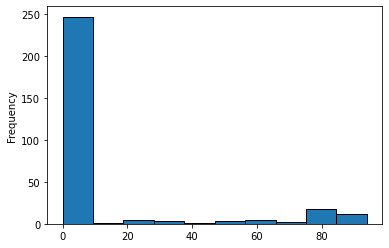

In [46]:
ax1 = jp.loc[jp['is_diterima']==1, 'avg_nilai_uan'].plot(kind='hist', edgecolor='black')

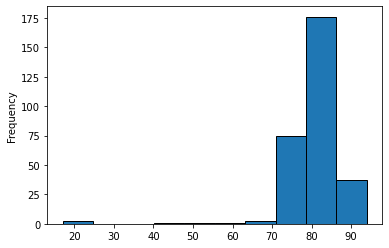

In [47]:
ax1 = jp.loc[jp['is_diterima']==1, 'avg_nilai_raport'].plot(kind='hist', edgecolor='black')

### Analisis Data Jalur Reguler

In [48]:
njp = pd.read_csv('data_njp.csv')

In [49]:
njp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   lokasi              1020 non-null   int64
 1   status              1020 non-null   int64
 2   tipe                1020 non-null   int64
 3   id_daftar_sekolah   1020 non-null   int64
 4   id_prodi_pilihan_1  1020 non-null   int64
 5   id_prodi_pilihan_2  1020 non-null   int64
 6   nilai_tpa_verbal    1020 non-null   int64
 7   nilai_tpa_spasial   1020 non-null   int64
 8   nilai_tpa_analogi   1020 non-null   int64
 9   nilai_tpa_numerik   1020 non-null   int64
 10  is_diterima         1020 non-null   int64
dtypes: int64(11)
memory usage: 87.8 KB


In [50]:
col_names = njp.columns.values.tolist()
for col in col_names:
    
    print(njp[col].value_counts()) 

0    684
1    336
Name: lokasi, dtype: int64
1    568
0    452
Name: status, dtype: int64
1    881
0    139
Name: tipe, dtype: int64
7       20
0       16
2213    13
144     11
16      11
        ..
304      1
2323     1
2321     1
737      1
1991     1
Name: id_daftar_sekolah, Length: 597, dtype: int64
9     586
7     128
6      99
10     68
3      68
4      28
5      26
2      12
11      3
8       2
Name: id_prodi_pilihan_1, dtype: int64
9     434
10    294
1     132
3      73
7      36
4      36
8       8
5       6
11      1
Name: id_prodi_pilihan_2, dtype: int64
10     268
20     118
100     88
30      84
60      83
40      70
80      67
130     63
150     48
170     28
90      26
180     22
120     17
70      14
160      8
50       7
190      4
140      3
110      2
Name: nilai_tpa_verbal, dtype: int64
10     113
60     111
20      86
30      83
90      78
100     69
80      62
70      57
50      54
110     53
130     47
120     39
40      38
140     37
160     30
150     22
180  

In [51]:
njp['is_diterima'].value_counts()

1    553
0    467
Name: is_diterima, dtype: int64

In [52]:
njp.isnull().sum()

lokasi                0
status                0
tipe                  0
id_daftar_sekolah     0
id_prodi_pilihan_1    0
id_prodi_pilihan_2    0
nilai_tpa_verbal      0
nilai_tpa_spasial     0
nilai_tpa_analogi     0
nilai_tpa_numerik     0
is_diterima           0
dtype: int64

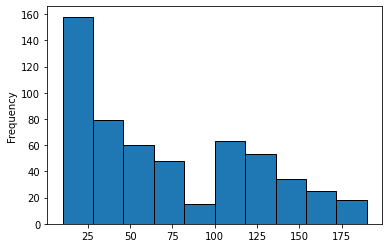

In [53]:
ax1 = njp.loc[njp['is_diterima']==1, 'nilai_tpa_verbal'].plot(kind='hist', edgecolor='black')

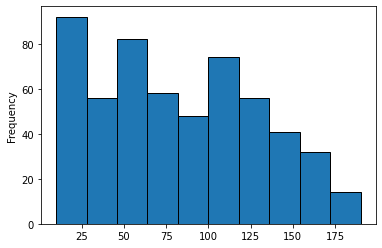

In [54]:
ax1 = njp.loc[njp['is_diterima']==1,"nilai_tpa_spasial"].plot(kind='hist', edgecolor='black')


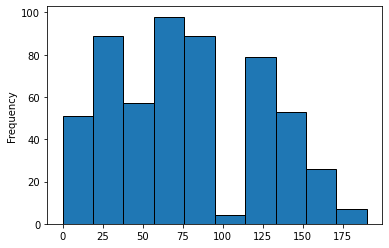

In [55]:
ax1 = njp.loc[njp['is_diterima']==1,"nilai_tpa_analogi"].plot(kind='hist', edgecolor='black')

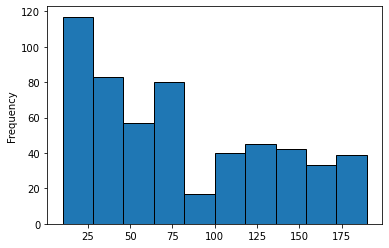

In [56]:
ax1 = njp.loc[njp['is_diterima']==1,"nilai_tpa_numerik"].plot(kind='hist', edgecolor='black')